In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

iris = pd.read_csv(url)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


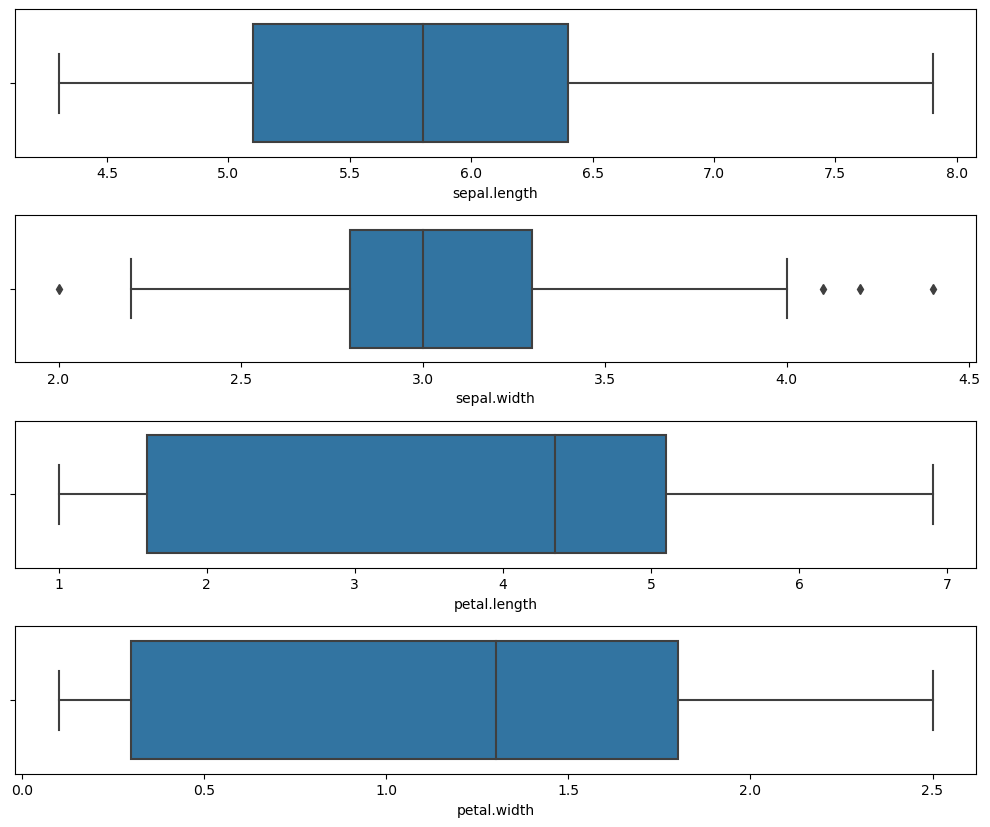

In [8]:
plt.figure(figsize=(10,10))
for i, col in zip(range(1, iris.shape[1]), iris.columns):
    plt.subplot(5,1,i)
    sns.boxplot(x=iris[col]);
    plt.tight_layout()

identificando os outliers de sepal width

In [9]:
iris[iris['sepal.width'] > 4]

,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,1.5,0.4,Setosa
32,5.2,4.1,1.5,0.1,Setosa
33,5.5,4.2,1.4,0.2,Setosa


In [10]:
iris[iris['sepal.width'] == 2]

,sepal.length,sepal.width,petal.length,petal.width,variety
60,5.0,2.0,3.5,1.0,Versicolor


Contando numero de amostras para cada especie

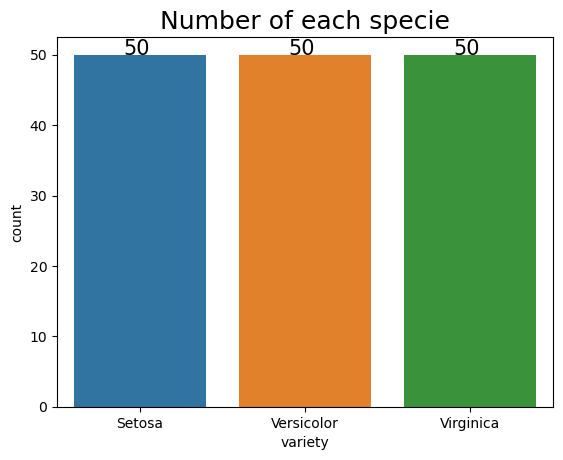

In [11]:
ax = sns.countplot(x='variety', data=iris);
plt.title('Number of each specie', fontsize=18)
for p in ax.patches:
    plt.annotate(p.get_height(), xy=(p.get_x()+0.3, p.get_height()), fontsize=15)

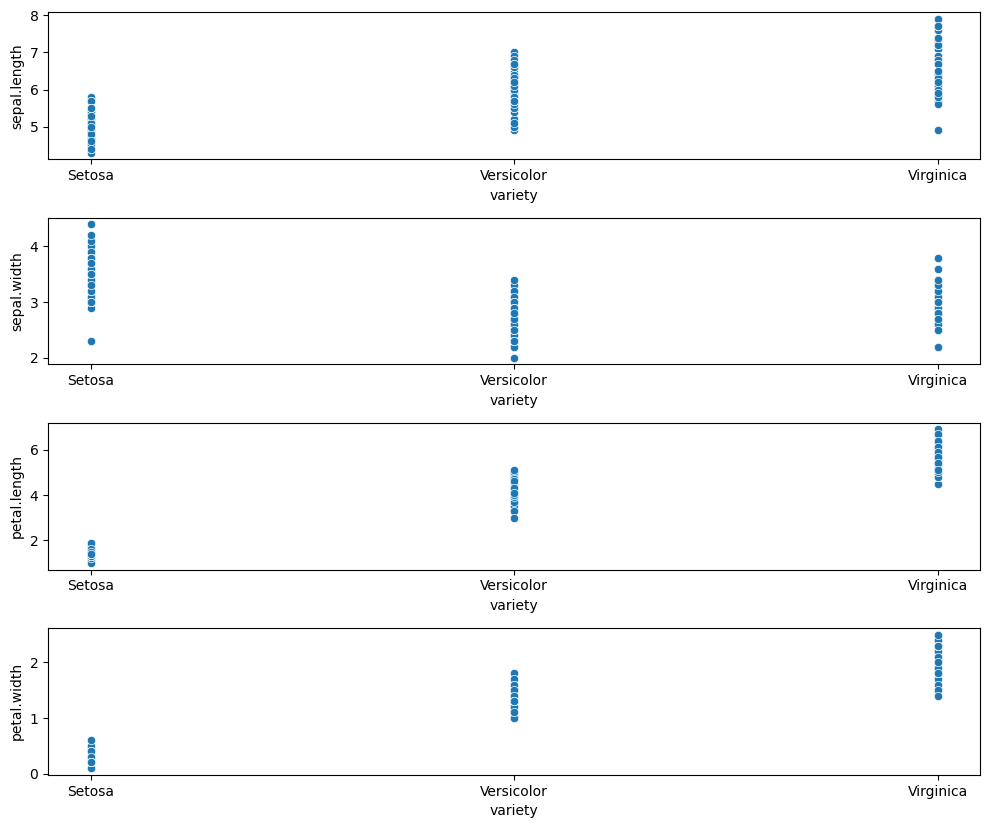

In [12]:
plt.figure(figsize=(10,10))
for i, col in zip(range(1, iris.shape[1]), iris.columns):
    plt.subplot(5,1,i)
    sns.scatterplot(y=iris[col], x=iris['variety']);
    plt.tight_layout()

<AxesSubplot:>

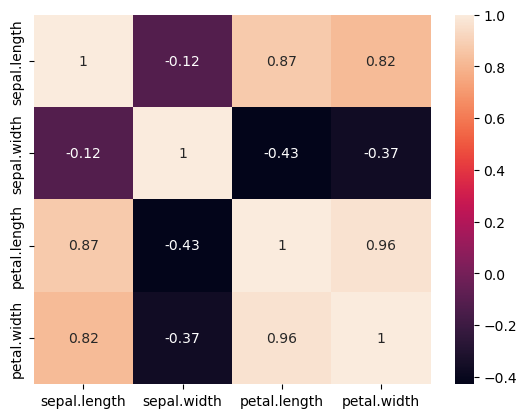

In [13]:
correlation = iris.corr()
sns.heatmap(correlation, annot=True)

Modelo mais simples

In [14]:
from sklearn.model_selection import train_test_split

X = iris.drop(columns=['variety'])
y = iris.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa'], dtype=object)

In [16]:
pd.DataFrame({'Predict':y_pred,
             'Real': y_test})

,Predict,Real
114,Virginica,Virginica
62,Versicolor,Versicolor
33,Setosa,Setosa
107,Virginica,Virginica
7,Setosa,Setosa
100,Virginica,Virginica
40,Setosa,Setosa
86,Versicolor,Versicolor
76,Versicolor,Versicolor
71,Versicolor,Versicolor


In [17]:
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



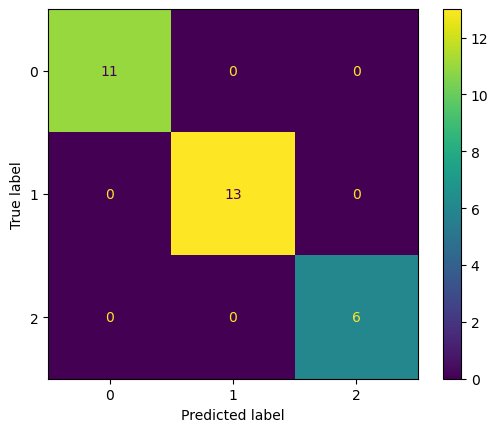

In [18]:
matriz_confusao = confusion_matrix(y_test, y_pred, labels= model.classes_)
cm = ConfusionMatrixDisplay(matriz_confusao)
cm.plot()

Utilizando StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X);

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



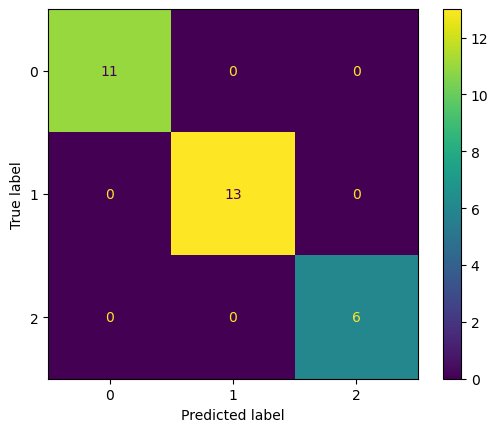

In [22]:
matriz_confusao = confusion_matrix(y_test, y_pred2, labels= model2.classes_)
cm = ConfusionMatrixDisplay(matriz_confusao)
cm.plot()

Gráficos no Plotly

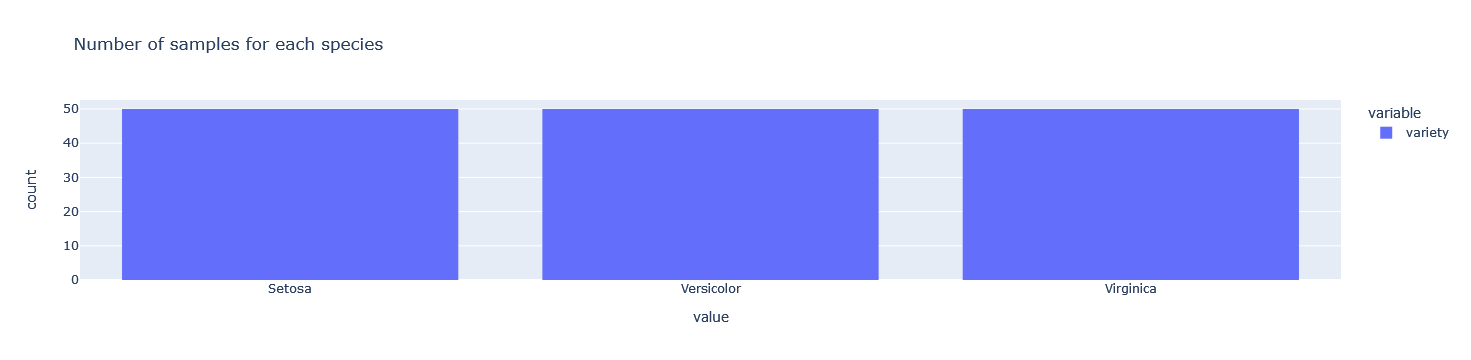

In [100]:
hist = px.histogram(iris['variety'], title='Number of samples for each species')
hist

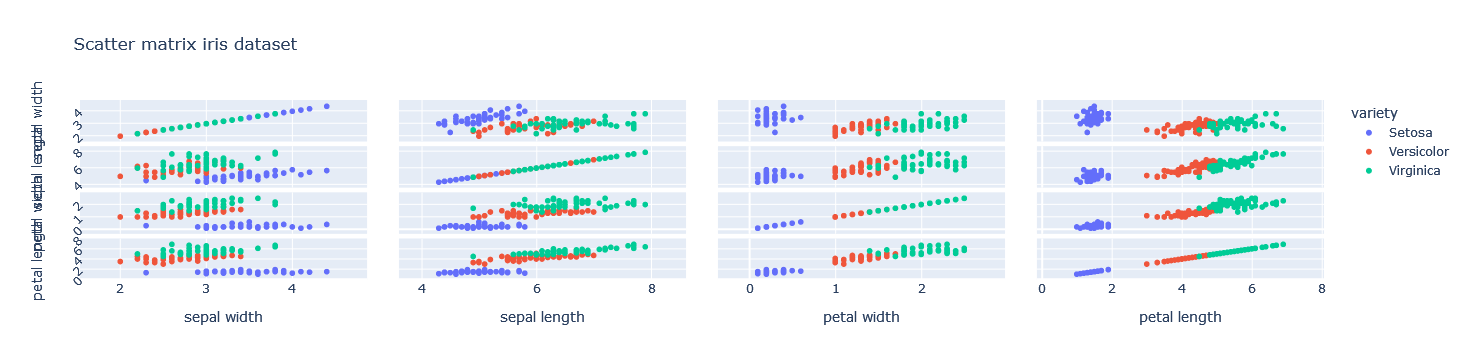

In [107]:
scattermatrix = px.scatter_matrix(iris,
                                  dimensions=["sepal.width", "sepal.length", "petal.width", "petal.length"], 
                                  color='variety', 
                                 title='Scatter matrix iris dataset',
                                 labels={col:col.replace('.',' ') for col in iris.columns})
scattermatrix.update_layout()
scattermatrix

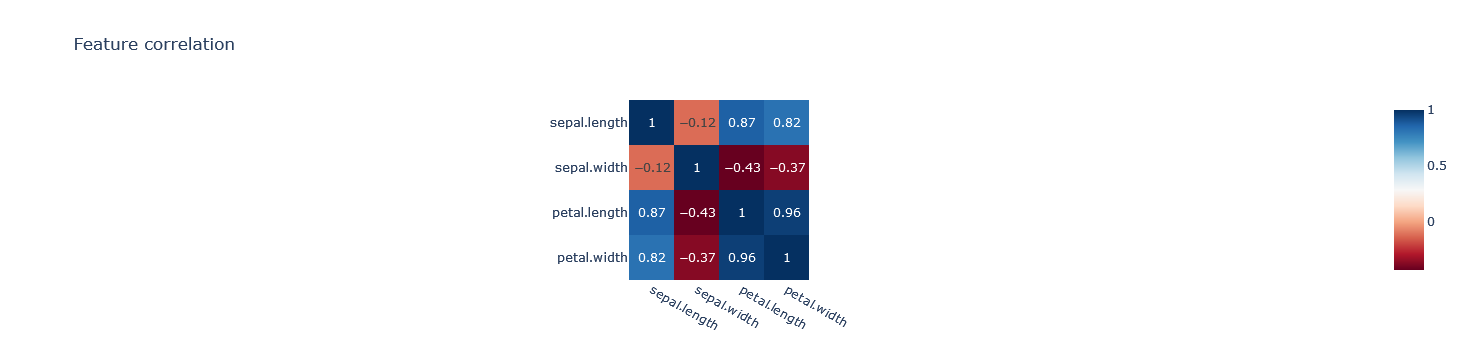

In [96]:
correlation = iris.corr()
correlation = round(correlation,2)
correlation = px.imshow(correlation, text_auto=True, title='Feature correlation',color_continuous_scale='rdbu')
correlation

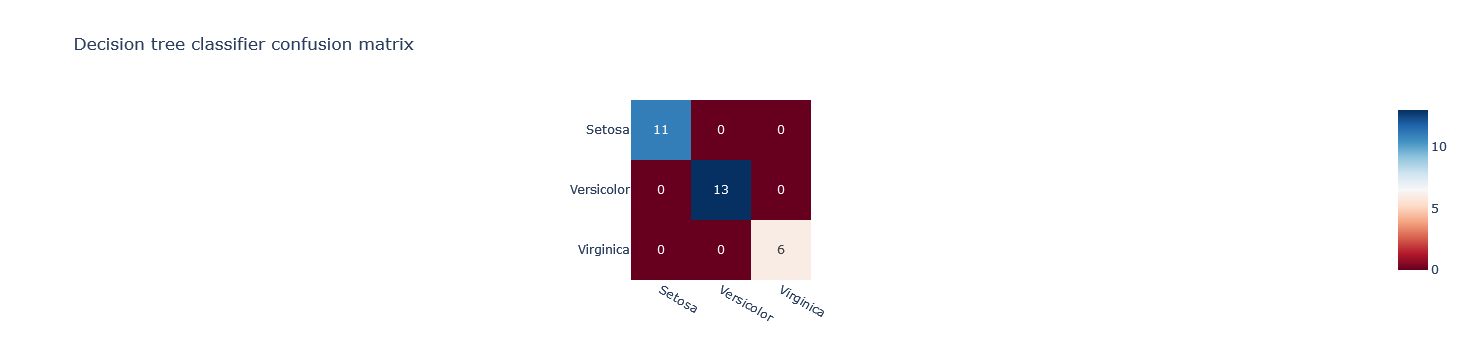

In [95]:
matriz_confusao = confusion_matrix(y_test, y_pred2)
cm =px.imshow(matriz_confusao, text_auto=True,
         x=model2.classes_, y=model2.classes_, title='Decision tree classifier confusion matrix',
             color_continuous_scale='rdbu')
cm

In [44]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go

In [102]:
app = dash.Dash(__name__)

app.config.suppress_callback_exceptions = True

app.layout = html.Div(children=[html.H1('Iris Dashboard',
                                       style={'color': 'blue',
                                             'textAlign': 'center',
                                             'font-size':40}),
                     html.Div([dcc.Graph(figure=hist),
                              dcc.Graph(figure=scattermatrix)], style={'display':'flex'}), 
                                
                     html.Div([dcc.Graph(figure=correlation),
                              dcc.Graph(figure=cm)], style={'display':'flex'})])

if __name__ == '__main__':
    app.run_server()
    
    '''
    app = dash.Dash(__name__)

app.layout = html.Div(children=[html.H1('Airline Dashboard',
                                       style={'color': '#503D36',
                                             'textAlign': 'center',
                                             'font-size':40}),
                              html.P('Proportion of distance group (250 mile distance interval group) by flights',
                                    style={'textAlign':'center',
                                          'color':'#F57241'}),
                              dcc.Graph(figure=fig)])

if __name__ == '__main__':
    app.run_server()
    '''

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving 

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Oct/2022 12:41:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2022 12:41:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2022 12:41:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2022 12:41:05] "GET /_favicon.ico?v=2.6.2 HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2022 12:41:05] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2022 12:41:05] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
